In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
candidate_info = pd.read_csv('Candidates_2018.txt', sep='\t')
raw = pd.read_csv('echo_computation3.csv', low_memory=False)
opponents = pd.read_csv('opponents.csv')

In [142]:
raw['ratio'] = raw.f_of_f_candidate_followers/raw.n_f_of_f
raw['ratio_normalized'] = raw.ratio/raw.n_candidate_followers
raw['ratio_normalized_log'] = raw.ratio/np.log(raw.n_candidate_followers)
#divide by number of followers + opponent followers 
#divide by log(number of candidate followers)

#raw['ratio_normalized'] = raw.ratio/ state followers


raw['only_candidate'] = raw.f_of_f_candidate_followers - raw.candidate_and_opponent_followers
raw['only_opponent'] = raw.opponent_followers - raw.candidate_and_opponent_followers

raw['ratio_only_candidate'] = raw.only_candidate / raw.n_f_of_f
raw['ratio_only_candidate_normalized'] = raw.ratio_only_candidate / raw.n_candidate_followers

raw['ratio_only_opponent'] = raw.only_opponent / raw.n_f_of_f
raw['ratio_only_opponent_normalized'] = raw.ratio_only_opponent / raw.n_candidate_followers

raw['ratio_candidate_and_opponent'] = raw.candidate_and_opponent_followers / raw.n_f_of_f
raw['ratio_candidate_and_opponent_normalized'] = raw.ratio_candidate_and_opponent / raw.n_candidate_followers

raw['ratio_opponent_over_candidate_followers'] = raw.opponent_followers / raw.n_f_of_f

/Users/davidreissmello/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [143]:
df = pd.merge(raw, candidate_info, left_on='candidates', right_on='UserID')

In [403]:
def opponent_followers(candidate_id):
    try:
        opp = opponents[opponents['republican_id'] == candidate_id].democrat_id.tolist() \
                + opponents[opponents['democrat_id'] == candidate_id].republican_id.tolist()

        if len(opp) != 0:
            opp = opp[0]
            opp_followers = raw[raw['candidates'] == opp].n_candidate_followers.values[0]
            can_followers = raw[raw['candidates'] == candidate_id].n_candidate_followers.values[0]

            return opp_followers + can_followers

        return 0 
    except:
        return 0

In [404]:
raw['n_can_opp_followers'] = raw.candidates.apply(opponent_followers)

In [405]:
raw['ratio_normalized_can_opp'] = raw.ratio/raw.n_can_opp_followers

# Most/Least Echo Chambered Candidates 

In [707]:
import json
with open('major_candidates.txt', 'r') as filehandle:
    major_candidates = json.load(filehandle)

In [406]:
candidate_echo = raw.groupby('candidates').mean()
states = pd.read_csv('states.csv')
candidate_echo = pd.merge(candidate_echo, states, left_on='Real Name', right_on='candidate')
candidate_echo = pd.merge(candidate_echo, candidate_info, left_index = True, right_on='UserID')
candidate_echo = candidate_echo[candidate_echo['Real Name'].isin(major_candidates)]

In [441]:
candidate_echo['ratio_normalized_state'] = candidate_echo.ratio / candidate_echo.population_2018

In [408]:
#THE CURRENT BOB FLANDERS ACCOUNT IS NOT THE REAL ONE, SO TAKING HIS NAME OUT
candidate_echo = candidate_echo[candidate_echo['Real Name'] != 'Bob Flanders']

In [443]:
#Remove Candidates with very few number of followers 
candidate_echo = candidate_echo[candidate_echo.n_candidate_followers > 10000]

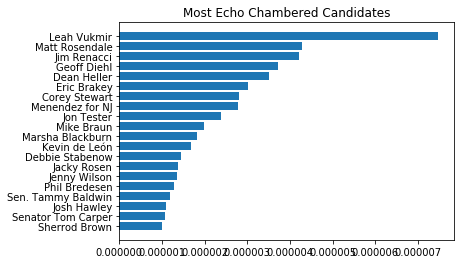

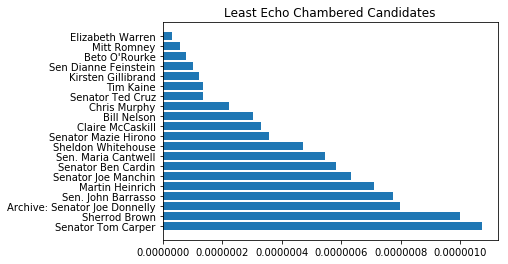

In [444]:
target = "ratio_normalized"
most_echod_candidate = candidate_echo.nlargest(20, target).sort_values(target, ascending=True)
plt.barh(most_echod_candidate['Real Name'], most_echod_candidate[target])
plt.title('Most Echo Chambered Candidates')
plt.show()

least_echod_candidate = candidate_echo.nsmallest(20, target).sort_values(target, ascending=False)
plt.barh(least_echod_candidate['Real Name'], least_echod_candidate[target])
plt.title('Least Echo Chambered Candidates')
plt.show()

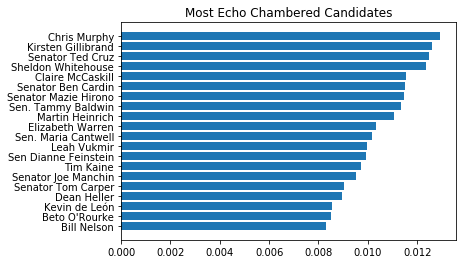

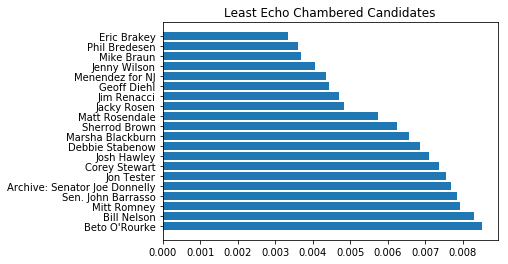

In [445]:
target = "ratio_normalized_log"
most_echod_candidate = candidate_echo.nlargest(20, target).sort_values(target, ascending=True)
plt.barh(most_echod_candidate['Real Name'], most_echod_candidate[target])
plt.title('Most Echo Chambered Candidates')
plt.show()

least_echod_candidate = candidate_echo.nsmallest(20, target).sort_values(target, ascending=False)
plt.barh(least_echod_candidate['Real Name'], least_echod_candidate[target])
plt.title('Least Echo Chambered Candidates')
plt.show()

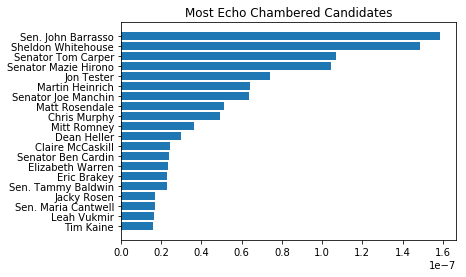

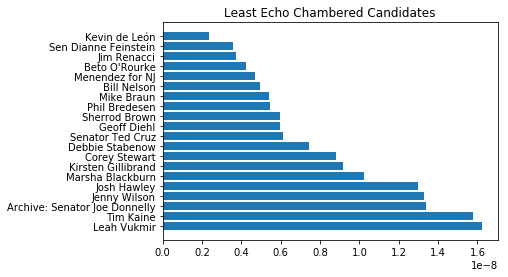

In [446]:
target = "ratio_normalized_state"
most_echod_candidate = candidate_echo.nlargest(20, target).sort_values(target, ascending=True)
plt.barh(most_echod_candidate['Real Name'], most_echod_candidate[target])
plt.title('Most Echo Chambered Candidates')
plt.show()

least_echod_candidate = candidate_echo.nsmallest(20, target).sort_values(target, ascending=False)
plt.barh(least_echod_candidate['Real Name'], least_echod_candidate[target])
plt.title('Least Echo Chambered Candidates')
plt.show()

# Distribution of Echo Chamberedness for Candidates

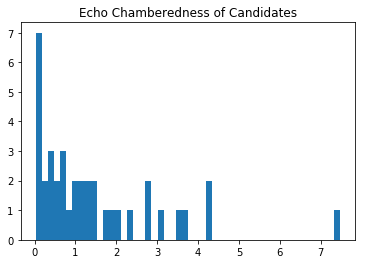

In [450]:
plt.hist(candidate_echo.ratio_normalized*1000000, bins=50)
plt.title('Echo Chamberedness of Candidates')
plt.show()

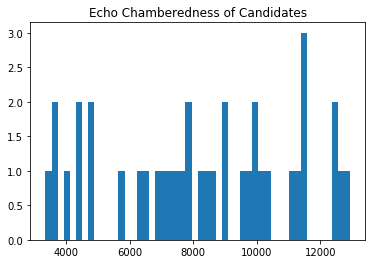

In [451]:
plt.hist(candidate_echo.ratio_normalized_log*1000000, bins=50)
plt.title('Echo Chamberedness of Candidates')
plt.show()

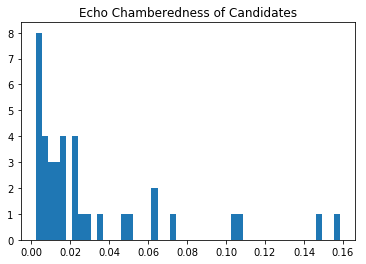

In [452]:
plt.hist(candidate_echo.ratio_normalized_state*1000000, bins=50)
plt.title('Echo Chamberedness of Candidates')
plt.show()

# How does number of followers correlate with echo chamberedness?

In [282]:
#remove small candidates and recompute graphs

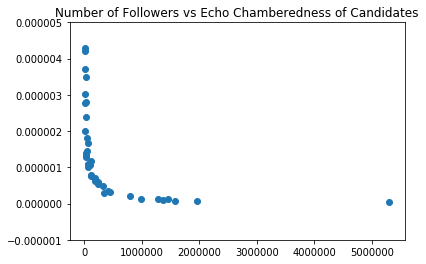

array([[ 1.        , -0.40867213],
       [-0.40867213,  1.        ]])

In [455]:
plt.scatter(candidate_echo.n_candidate_followers, candidate_echo.ratio_normalized)
plt.title('Number of Followers vs Echo Chamberedness of Candidates')
plt.ylim(-0.000001, 0.000005)
plt.show()
np.corrcoef(candidate_echo.n_candidate_followers, candidate_echo.ratio_normalized)

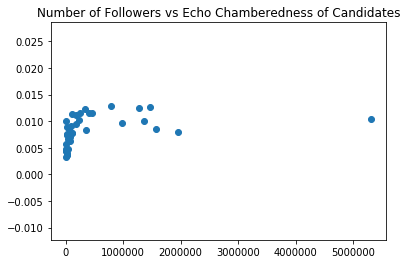

array([[1.        , 0.34867673],
       [0.34867673, 1.        ]])

In [457]:
plt.scatter(candidate_echo.n_candidate_followers, candidate_echo.ratio_normalized_log)
plt.title('Number of Followers vs Echo Chamberedness of Candidates')
plt.show()
np.corrcoef(candidate_echo.n_candidate_followers, candidate_echo.ratio_normalized_log)

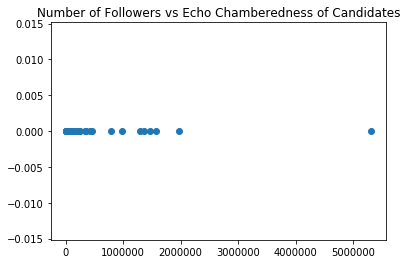

array([[ 1.        , -0.07816587],
       [-0.07816587,  1.        ]])

In [458]:
plt.scatter(candidate_echo.n_candidate_followers, candidate_echo.ratio_normalized_state)
plt.title('Number of Followers vs Echo Chamberedness of Candidates')
plt.show()
np.corrcoef(candidate_echo.n_candidate_followers, candidate_echo.ratio_normalized_state)

# POLLS

In [459]:
#polls = pd.read_csv('../poll_variance/poll_variances_2018.csv')

In [460]:
from fuzzywuzzy import fuzz

def match_name(name, list_names, min_score=0):
    # -1 score incase we don't get any matches
    max_score = -1
    # Returning empty name for no match as well
    max_name = ""
    # Iternating over all names in the other
    for name2 in list_names:
        #Finding fuzzy match score
        score = fuzz.ratio(name, name2)
        # Checking if we are above our threshold and have a better score
        if (score > min_score) & (score > max_score):
            max_name = name2
            max_score = score
    return (max_name, max_score)

In [294]:
# List for dicts for easy dataframe creation
dict_list = []
# iterating over our players without salaries found above
for name in candidate_echo['Real Name']:
    # Use our method to find best match, we can set a threshold here
    match = match_name(name, polls.candidate_name)
    
    # New dict for storing data
    dict_ = {}
    dict_.update({"twitter_name" : name})
    dict_.update({"poll_name" : match[0]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)
    
merge_table = pd.DataFrame(dict_list)
# Display results


NameError: name 'polls' is not defined

In [ ]:
polls = pd.merge(polls, merge_table, left_on='candidate_name', right_on='poll_name')
polls.to_csv('polls_twitter_names.csv', index=False)

In [461]:
polls_new = pd.read_csv('polls_twitter_names_clean.csv')

In [462]:
poll_analysis = pd.merge(candidate_echo, polls_new, left_on='Real Name', right_on='twitter_name')

In [465]:
poll_analysis = poll_analysis[poll_analysis.poll_variance.isnull() == False]

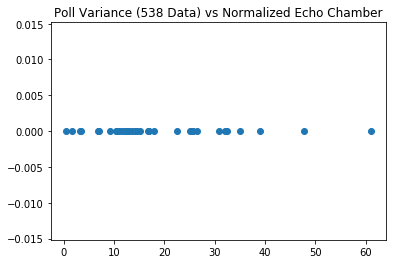

array([[1.        , 0.10767896],
       [0.10767896, 1.        ]])

In [467]:
plt.scatter(poll_analysis.poll_variance, poll_analysis.ratio_normalized)
plt.title('Poll Variance (538 Data) vs Normalized Echo Chamber')
plt.show()
np.corrcoef(poll_analysis.poll_variance, poll_analysis.ratio_normalized)

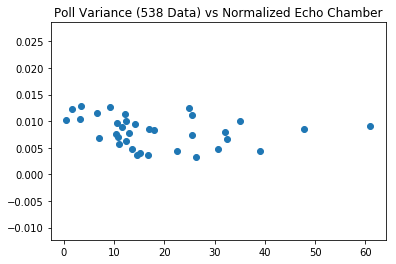

array([[ 1.        , -0.23873998],
       [-0.23873998,  1.        ]])

In [468]:
plt.scatter(poll_analysis.poll_variance, poll_analysis.ratio_normalized_log)
plt.title('Poll Variance (538 Data) vs Normalized Echo Chamber')
plt.show()
np.corrcoef(poll_analysis.poll_variance, poll_analysis.ratio_normalized_log)

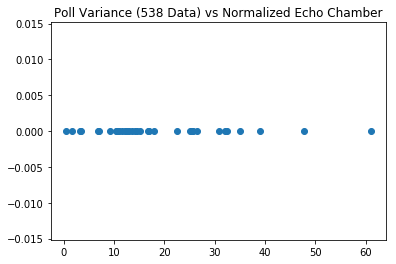

array([[ 1.        , -0.02560436],
       [-0.02560436,  1.        ]])

In [469]:
plt.scatter(poll_analysis.poll_variance, poll_analysis.ratio_normalized_state)
plt.title('Poll Variance (538 Data) vs Normalized Echo Chamber')
plt.show()
np.corrcoef(poll_analysis.poll_variance, poll_analysis.ratio_normalized_state)

In [574]:
poll_analysis.corr()['poll_variance'].sort_values()

ratio_normalized_can_opp                  -0.360019
score                                     -0.355209
ratio_only_candidate                      -0.288212
followers                                 -0.251266
ratio                                     -0.244003
ratio_normalized_log                      -0.238740
n_candidate_followers                     -0.158124
Followers Count                           -0.158118
Statuses Count                            -0.118489
ratio_normalized_state                    -0.025604
ratio_only_candidate_normalized           -0.010278
ratio_candidate_and_opponent_normalized   -0.010278
UserID                                    -0.002983
only_candidate                             0.018963
ratio_only_opponent_normalized             0.038981
f_of_f_candidate_followers                 0.063203
ratio_normalized                           0.107679
Friends Count                              0.117460
ratio_only_opponent                        0.152102
n_can_opp_fo

In [583]:
X_original = poll_analysis[list(poll_analysis.corr().columns)].drop(columns=['poll_variance', 'ratio_normalized_can_opp'])
y = poll_analysis.poll_variance

In [585]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X_original)
X = pd.DataFrame(X, columns=X_original.columns, index = X_original.index)

/Users/davidreissmello/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/davidreissmello/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [586]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          poll_variance   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                 -1.098
Method:                 Least Squares   F-statistic:                    0.1673
Date:                Fri, 15 Nov 2019   Prob (F-statistic):               1.00
Time:                        15:42:16   Log-Likelihood:                -154.60
No. Observations:                  35   AIC:                             353.2
Df Residuals:                      13   BIC:                             387.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [587]:
results.params.sort_values()

n_candidate_followers                     -54084.465241
ratio_only_candidate                          -7.930318
ratio                                         -7.659272
score                                         -5.499288
candidate_and_opponent_followers              -5.176945
ratio_only_candidate_normalized               -4.312444
ratio_candidate_and_opponent_normalized       -4.312444
opponent_followers                            -3.835469
only_opponent                                 -3.460938
Statuses Count                                -2.885657
ratio_only_opponent                           -1.675525
UserID                                        -1.472150
n_f_of_f                                      -1.365602
followers                                     -1.298992
ratio_opponent_over_candidate_followers       -0.550639
Friends Count                                 -0.134269
ratio_normalized                               0.564846
f_of_f_candidate_followers                     1

# VOTER TURNOUT 

figure out the state for each twitter account

In [654]:
election_results = pd.read_csv('election_results.csv')

In [655]:
dem_candidates = election_results.candidate_18_dem.dropna()
rep_candidates = election_results.candidate_18_rep.dropna()

In [656]:
#match democrats, then republicans
# List for dicts for easy dataframe creation
dict_list = []
# iterating over our players without salaries found above
#for name in rep_candidates:
for name in dem_candidates:
    # Use our method to find best match, we can set a threshold here
    match = match_name(name, candidate_echo['Real Name'])

    # New dict for storing data
    dict_ = {}
    dict_.update({"twitter_name" : name})
    dict_.update({"dem_name" : match[0]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)


merge_table = pd.DataFrame(dict_list)
# Display results
#merge_table.to_csv('rep_candidates_fuzzy.csv', index=False)
merge_table.to_csv('dem_candidates_fuzzy1.csv', index=False)


In [657]:
rep_candidates_fuzzy = pd.read_csv('rep_candidates_fuzzy.csv')
rep_candidates_fuzzy.columns = ['rep_twitter_name', 'score', 'rep_name']
dem_candidates_fuzzy = pd.read_csv('dem_candidates_fuzzy.csv')
dem_candidates_fuzzy.columns = ['dem_twitter_name', 'score', 'dem_name']

In [658]:
election_results = pd.merge(election_results, rep_candidates_fuzzy, left_on='candidate_18_rep', right_on='rep_name')
election_results = pd.merge(election_results, dem_candidates_fuzzy, left_on='candidate_18_dem', right_on='dem_name')

In [659]:
state_candidate_twitter = election_results[['state', 'dem_twitter_name', 'rep_twitter_name']]
state_candidate_twitter = pd.melt(state_candidate_twitter, id_vars='state', value_vars=['dem_twitter_name', 'rep_twitter_name'] )


In [660]:
candidate_echo_vt = pd.merge(candidate_echo, state_candidate_twitter, left_on='Real Name', right_on='value')

now use voter turnout data 

In [661]:
voter_turnout = pd.read_csv('voter_turnout.csv')[['State', 'Estimated or Actual 2018 Total Ballots Counted VEP Turnout Rate']]
voter_turnout.columns = ['state','voter_turnout']


In [662]:
voter_turnout['voter_turnout'] = voter_turnout.voter_turnout.apply(lambda x: float(x.strip('%')))

In [663]:
candidate_echo_vt = pd.merge(candidate_echo_vt, voter_turnout, left_on='state_x', right_on='state')

In [664]:
vt_analysis = candidate_echo_vt.groupby('state').agg({'voter_turnout': 'mean',
                                                      'n_candidate_followers': ['mean', 'min', 'max'],
                                                      'ratio_normalized': ['mean', 'min', 'max'],
                                                      'ratio_normalized_log':['mean', 'min', 'max'],
                                                      'ratio_normalized_state':['mean', 'min', 'max'],
                                                      'ratio': ['mean', 'min', 'max'],
                                                      'ratio_only_candidate': ['mean', 'min', 'max'],
                                                      'ratio_only_candidate_normalized': ['mean', 'min', 'max'],
                                                      'ratio_opponent_over_candidate_followers':['mean', 'min', 'max']})

In [665]:
vt_analysis.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in vt_analysis.columns]

In [666]:
aggregation_ratios = {'voter_turnout': 'mean',
                      'n_candidate_followers': ['mean', 'min', 'max'],
                      'ratio_normalized': ['mean', 'min', 'max'],
                      'ratio_normalized_log':['mean', 'min', 'max'],
                      'ratio_normalized_state':['mean', 'min', 'max'],
                      'ratio': ['mean', 'min', 'max'],
                      'ratio_only_candidate': ['mean', 'min', 'max'],
                      'ratio_only_candidate_normalized': ['mean', 'min', 'max'],
                      'ratio_opponent_over_candidate_followers':['mean', 'min', 'max']}
ratios = list(aggregation_ratios.keys())
ratios

['voter_turnout',
 'n_candidate_followers',
 'ratio_normalized',
 'ratio_normalized_log',
 'ratio_normalized_state',
 'ratio',
 'ratio_only_candidate',
 'ratio_only_candidate_normalized',
 'ratio_opponent_over_candidate_followers']

In [667]:
for ratio in ratios[1:]:
    vt_analysis[ratio + '_diff'] = vt_analysis[ratio + '_max'] - vt_analysis[ratio + '_min']

In [668]:
vt_analysis.head()

voter_turnout_mean  n_candidate_followers_mean  \
state                                                         
California                 49.6                    711138.5   
Connecticut                54.4                    791927.0   
Delaware                   51.4                     96467.0   
Florida                    54.9                    347085.0   
Hawaii                     39.3                    414931.0   

             n_candidate_followers_min  n_candidate_followers_max  \
state                                                               
California                     55973.0                  1366304.0   
Connecticut                   791927.0                   791927.0   
Delaware                       96467.0                    96467.0   
Florida                       347085.0                   347085.0   
Hawaii                        414931.0                   414931.0   

             ratio_normalized_mean  ratio_normalized_min  \
state                                                      
California            8.879648e-07          1.027903e-07   
Connecticut           2.216335e-07          2.216335e-07   
Delaware              1.072510e-06          1.072510e-06   
Florida               3.047101e-07          3.047101e-07   
Hawaii                3.568869e-07          3.568869e-07   

             ratio_normalized_max  ratio_normalized_log_mean  \
state                                                          
California           1.673139e-06                   0.009254   
Connecticut          2.216335e-07                   0.012923   
Delaware             1.072510e-06                   0.009015   
Florida              3.047101e-07                   0.008290   
Hawaii               3.568869e-07                   0.011448   

             ratio_normalized_log_min  ratio_normalized_log_max  ...  \
state                                                            ...   
California                   0.008566                  0.009941  ...   
Connecticut                  0.012923                  0.012923  ...   
Delaware                     0.009015                  0.009015  ...   
Florida                      0.008290                  0.008290  ...   
Hawaii                       0.011448                  0.011448  ...   

             ratio_opponent_over_candidate_followers_min  \
state                                                      
California                                      0.032124   
Connecticut                                     0.002351   
Delaware                                        0.000000   
Florida                                         0.000000   
Hawaii                                          0.000000   

             ratio_opponent_over_candidate_followers_max  \
state                                                      
California                                      0.131112   
Connecticut                                     0.002351   
Delaware                                        0.000000   
Florida                                         0.000000   
Hawaii                                          0.000000   

             n_candidate_followers_diff  ratio_normalized_diff  \
state                                                            
California                    1310331.0               0.000002   
Connecticut                         0.0               0.000000   
Delaware                            0.0               0.000000   
Florida                             0.0               0.000000   
Hawaii                              0.0               0.000000   

             ratio_normalized_log_diff  ratio_normalized_state_diff  \
state                                                                 
California                    0.001375                 1.182904e-09   
Connecticut                   0.000000                 0.000000e+00   
Delaware                      0.000000                 0.000000e+00   
Florida                       0.000000              

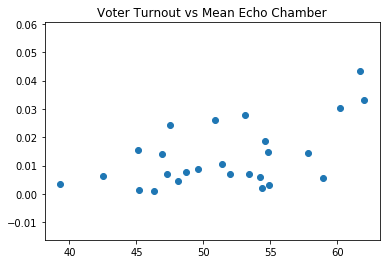

array([[1.        , 0.54077782],
       [0.54077782, 1.        ]])

In [669]:
plt.scatter(vt_analysis.voter_turnout_mean,vt_analysis.ratio_normalized_mean*10000)
plt.title('Voter Turnout vs Mean Echo Chamber')
plt.show()
np.corrcoef(vt_analysis.voter_turnout_mean,vt_analysis.ratio_normalized_mean)

In [670]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(vt_analysis.iloc[:,1:])
X = pd.DataFrame(X, columns=vt_analysis.columns[1:], index = vt_analysis.index)
y = vt_analysis.voter_turnout_mean

In [671]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     voter_turnout_mean   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -1.578
Method:                 Least Squares   F-statistic:                  0.005312
Date:                Fri, 15 Nov 2019   Prob (F-statistic):               1.00
Time:                        16:41:32   Log-Likelihood:                -139.46
No. Observations:                  26   AIC:                             310.9
Df Residuals:                      10   BIC:                             331.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [672]:
results.params.sort_values()

ratio_normalized_log_diff                      -16.553788
ratio_only_candidate_diff                      -14.057178
ratio_only_candidate_max                       -10.537089
ratio_normalized_log_max                        -9.238438
ratio_only_candidate_normalized_min             -6.309048
ratio_only_candidate_mean                       -4.344076
ratio_opponent_over_candidate_followers_diff    -4.285433
ratio_normalized_log_mean                       -3.000001
ratio_opponent_over_candidate_followers_max     -2.449784
n_candidate_followers_min                       -2.379297
n_candidate_followers_mean                      -2.016499
ratio_normalized_state_min                      -1.686882
ratio_min                                       -1.644162
ratio_normalized_diff                           -1.587936
n_candidate_followers_max                       -1.421737
ratio_opponent_over_candidate_followers_mean    -1.071392
ratio_normalized_state_mean                     -0.910964
ratio_normaliz

# ELECTION OUTCOME 

In [673]:
election_results['dem_winner18'] = (election_results.pct_votes_18_dem > election_results.pct_votes_18_rep)*1

In [674]:
election_results = pd.merge(election_results, vt_analysis, 
                            left_on='state', right_index=True, 
                            how='right')

In [675]:
er_model = election_results[list(election_results.corr().columns)]
columns_drop = ['Unnamed: 0', 'pct_votes_18_rep', 'score_x', 'score_y', 'voter_turnout_mean', 'state_senate_other_seats17']
er_model.drop(columns=columns_drop, inplace=True)
er_model.set_index(vt_analysis.index, inplace=True)

/Users/davidreissmello/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [682]:
y1 = er_model.pct_votes_18_dem
y2 = er_model.dem_winner18
er_model.drop(columns=['pct_votes_18_dem', 'dem_winner18'], inplace=True)

/Users/davidreissmello/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [686]:
X = StandardScaler().fit_transform(er_model)
X = pd.DataFrame(X, columns=er_model.columns, index=er_model.index)

/Users/davidreissmello/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/davidreissmello/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [704]:
import statsmodels.api as sm
model = sm.OLS(y1, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       pct_votes_18_dem   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                -23.628
Method:                 Least Squares   F-statistic:                  0.002229
Date:                Fri, 15 Nov 2019   Prob (F-statistic):               1.00
Time:                        16:53:05   Log-Likelihood:                -19.458
No. Observations:                  26   AIC:                             88.92
Df Residuals:                       1   BIC:                             120.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [702]:
import statsmodels.api as sm
model = sm.Logit(y2, X)
results = model.fit_regularized()
print(results.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.4286571082016174e-10
            Iterations: 38
            Function evaluations: 38
            Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:           dem_winner18   No. Observations:                   26
Model:                          Logit   Df Residuals:                      -65
Method:                           MLE   Df Model:                           90
Date:                Fri, 15 Nov 2019   Pseudo R-squ.:                   1.000
Time:                        16:52:46   Log-Likelihood:            -3.7145e-09
converged:                       True   LL-Null:                       -16.048
                                        LLR p-value:                     1.000
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

/Users/davidreissmello/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/davidreissmello/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/davidreissmello/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/davidreissmello/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
